# Clustering with ClusTCR

Some additional info...

In [ ]:
!conda --version
#If !conda --version returns no results, install conda with :
#!pip install -q condacolab
#import condacolab
#condacolab.install()

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
!conda install clustcr -c svalkiers -c bioconda -c pytorch -c conda-forge

In [1]:
# Import packages
import pandas as pd

from clustcr import Clustering

In [ ]:
#!cat /proc/cpuinfo

In [2]:
# Initiate ClusTCR clustering object
clustering = Clustering(n_cpus=20) # change n_cpus to nunber of threads in your machine

In [14]:
p1_d0 = pd.read_csv('P1_0_parsed.tsv', sep='\t', index_col=[0])
p1_d15 = pd.read_csv('P1_15_parsed.tsv', sep='\t', index_col=[0])

In [15]:
p1_d0["timepoint"] = "0"
p1_d15["timepoint"] = "15"

data_merged = pd.concat([p1_d0, p1_d15])

In [17]:
# Fit data to the clustering object
clustering_result = clustering.fit(data_merged['junction_aa'])

Clustering 603628 TCRs using two-step approach.
Total time to run ClusTCR: 129.501s


In [5]:
feature_df = result_pre.compute_features(compute_pgen=False)

/home/vincent/miniforge-pypy3/envs/tcr_workshop/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/vincent/miniforge-pypy3/envs/tcr_workshop/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/vincent/miniforge-pypy3/envs/tcr_workshop/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/vincent/miniforge-pypy3/envs/tcr_workshop/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/vincent/miniforge-pypy3/envs/tcr_workshop/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/vincent/miniforge-pypy3/envs/tcr_workshop/lib/

In [20]:
clustering_summary = clustering_result.summary()
clustering_summary['sequences'] = clustering_result.cluster_contents()
clustering_summary

,size,motif,sequences
0,105,CASS..[AS]G.SYEQYF,"[CASSDPSGSSYEQYF, CASSHPSGSSYEQYF, CASSPPTGGSY..."
1,157,CASS.TSG..YEQYF,"[CASSPTSGNSYEQYF, CASSPTSGSSYEQYF, CASSETSGRIY..."
2,6,CASSQAVGasYEQYF,"[CASSQAVGASYEQYF, CASSQVVGASYEQYF, CASSQAVGAGY..."
3,3,CASSQgyLGTYEQYF,"[CASSQGNLGTYEQYF, CASSQGYLGTYEQYF, CASSQDYLGTY..."
4,28,CASSQ[DE]LAG.YEQYF,"[CASSQDLAGSYEQYF, CASSQDLAGVYEQYF, CASSQKLAGSY..."
...,...,...,...
24663,2,CA[VN]RGVHNEQFF,"[CANRGVHNEQFF, CAVRGVHNEQFF]"
24664,2,CASGS[VI]SHEQYF,"[CASGSISHEQYF, CASGSVSHEQYF]"
24665,2,CASTG[YF]GETQYF,"[CASTGFGETQYF, CASTGYGETQYF]"
24666,2,CASSLI[FM]GEQYF,"[CASSLIFGEQYF, CASSLIMGEQYF]"


In [21]:
clustering_clusters = clustering_result.clusters_df
clustering_clusters

,junction_aa,cluster
0,CASSDPSGSSYEQYF,0
1,CASSHPSGSSYEQYF,0
2,CASSPPTGGSYEQYF,0
3,CASSPPTGSSYEQYF,0
4,CASSQEAGSSYEQYF,0
...,...,...
255179,CASTGYGETQYF,24665
255180,CASSLIFGEQYF,24666
255181,CASSLIMGEQYF,24666
255182,CASSTIDPRQFF,24667


In [31]:
data_merged = pd.merge(
    left = data_merged,
    right= clustering_clusters,
    on="junction_aa",
    how="right"
)

In [11]:
# Same can be done for post_repertoire or clustering of both repertoires together, depending on the research question

In [59]:
cluster_sizes = data_merged.groupby(["cluster", "timepoint"]).agg({"junction_aa":len, "Total_count":sum, "Total_frequency":sum}).rename({"junction_aa":"size"}, axis="columns").unstack().fillna(0)

In [68]:
cluster_sizes['size', 'delta'] = cluster_sizes['size', '15'] - cluster_sizes['size', '0']
cluster_sizes['size', 'delta'] = cluster_sizes['size', '15'] - cluster_sizes['size', '0']


In [73]:
cluster_sizes["size"].sort_values(by="delta")

timepoint,0,15,delta
cluster,,,
16094,404.0,302.0,-102.0
24205,429.0,329.0,-100.0
20383,461.0,362.0,-99.0
10323,304.0,219.0,-85.0
4372,391.0,306.0,-85.0
...,...,...,...
24039,97.0,129.0,32.0
10131,142.0,175.0,33.0
7312,330.0,364.0,34.0


In [83]:
clustering_summary.loc[16094]

size                                                       586
motif                                              CAS....EQFF
sequences    [CASLAANEQFF, CASLAYNEQFF, CASSQNNEQFF, CASSQP...
Name: 16094, dtype: object

In [29]:
import seaborn as sns

<Axes: >

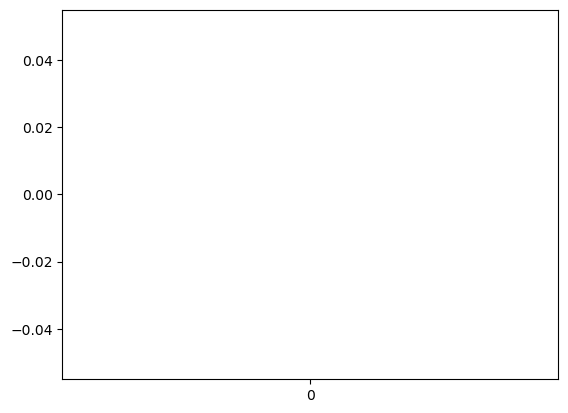

In [30]:
sns.pointplot()